<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>Team 2 | Building a Model in Kaggle</h1><br>

Anushka Sehgal<br>
Mai Takara<br>
Roan Guilherme Weigert Salgueiro<br>
Swapnil Tirpude<br>
Won Seok Hur<br><br>
Business Challenge #2 - BCH-7813 - MBAN2<br>
Hult International Business School<br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br>
<h2>The analysis</h2>
This analysis aims to provide insights from a predictive model developed using Python Machine Learning. The dataset used for the analysis is the House Prices dataset, and machine learning techniques are used to predict the target variable Sale Price. The model's performance is evaluated using metrics such as mean squared error (MSE) and R-squared. From the results, actionable insights are extracted to optimize business strategies, improve efficiency, and mitigate risks.
<br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>




In [1]:
# importing additional libraries
import matplotlib.pyplot       as plt # essential graphical output
import seaborn                 as sns # enhanced graphical output
import statsmodels.formula.api as smf # predictive modeling with nice outputs
import sklearn.linear_model           # linear modeling in scikit-learn
import pandas as pd                   # Pandas library
import numpy as np                    # Numpy library
import datetime                       # Define current year
from scipy import stats               # statistics function
from sklearn.model_selection import RandomizedSearchCV #RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder        #One hot Encoder


In [2]:

# importing the training dataset
path             = "/kaggle/input/house-prices-advanced-regression-techniques/"
training_dataset = "train.csv"


# reading in the .csv file with pandas
housing_train    = pd.read_csv(filepath_or_buffer = path + training_dataset)

z_scores = np.abs((housing_train - housing_train.mean()) / housing_train.std())
outliers = housing_train[z_scores > 3].dropna()

# checking basic info about the dataset
housing_train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 81 entries, Id to SalePrice
dtypes: float64(3), int64(35), object(43)
memory usage: 924.0+ KB


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == "__main__":


In [3]:
# importing the training dataset
path             = "/kaggle/input/house-prices-advanced-regression-techniques/"
testing_dataset  = 'test.csv'

# importing the testing dataset
housing_test = pd.read_csv(filepath_or_buffer = path + testing_dataset)

z_scores = np.abs((housing_test - housing_test.mean()) / housing_test.std())
outliers = housing_test[z_scores > 3].dropna()
# checking basic info about the dataset
housing_test.columns

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<h2>Analysis outputs - Describe function</h2>

Using the describe function is an important step in analyzing a dataset as it provides a summary of key statistical measures for each column, including mean, standard deviation, and quartile values.
The 'OverallQual' column has a low standard deviation of 1.382997, indicating that the values in this column are relatively close to the mean and may not have a significant impact on the overall analysis.

Several columns, including 'GrLivArea', 'GarageArea', and '1stFlrSF', have mean values that can provide insight into the size of the homes in the dataset.
The quartile values for 'FullBath' can provide information on the distribution of bathroom sizes in the dataset, with a minimum value of 0 and a maximum value of 2.

The quartile values for 'YearRemodAdd' can provide information on the distribution of the year of remodeling in the dataset, with a minimum value of 1950 and a maximum value of 2010. Additionally, the mean value of 976 for 'GarageSize' indicates the average size of garages in the dataset, while the quartile values for 'Fireplaces' can provide information on the distribution of homes with fireplaces.

'OverallQual' has a low std  1.382997 
'1stFlrSF' mean     1162.626712     
'FullBath' min = 0, 25% = 1, 50% = 2 and 75% = 2       
'YearRemodAdd' min 1950,25% 1967, 50% 1994, 75% 2004 and max 2010
'GarageSize', mean is 976
'Fireplaces' 25% = 0 , 50% = 1 and 75% = 1

In [4]:
housing_train.describe(include='all') 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
housing_train['YearRemodAdd'].describe() 

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

<h2>Analysis outputs - Sorting operation </h2>

Sorting is a key pandas operation used in data analysis projects, as it allows us to order the data by specific column values and quickly identify trends and patterns in the data.
By using the 'groupby' function in pandas, we can group the data by a specific column, in this case, 'OverallQual', and analyze the data based on this grouping.

The 'mean' function applied to the 'SalePrice' column can provide insight into the average sale price for each 'OverallQual' group in the dataset.
Sorting the data by 'SalePrice' in descending order using the 'sort_values' function can help us identify the 'OverallQual' groups with the highest and lowest average sale prices.

From the output, we can see that homes with an 'OverallQual' of 10 have the highest average sale price at $$438.588 , while homes with an 'OverallQual' of 1 have the lowest average sale price at $50,150. This information can be used to identify trends and patterns in the data and make informed decisions regarding Sales pricing.

In [6]:
housing_train.groupby('OverallQual')[['SalePrice']].mean().sort_values(['SalePrice'], ascending=False).head(11)


,SalePrice
OverallQual,
10,438588.388889
9,367513.023256
8,274735.535714
7,207716.423197
6,161603.034759
5,133523.347607
4,108420.655172
3,87473.750000
2,51770.333333


<h2>Analysis Outputs - Null values </h2>

Null values in a dataset can be problematic as they may cause inaccuracies in data analysis and modeling. In our dataset, we identified several columns with null values, including GarageQual, PoolQC, Fence, and GarageType. To address the null values in our dataset, we used the fillna function to replace the missing values in these columns with the value 'none'. 

Additionally, we noticed null values in the GarageArea and GarageCars columns, which we replaced with 0 since these null values indicate the absence of a garage. It's important to handle null values properly in a dataset to avoid misleading results and ensure the accuracy of any analysis or modeling performed on the data.

In [7]:
print ("GarageQual " + str(housing_train['GarageQual'].isna().sum()))
print ("PoolQC " + str(housing_train['PoolQC'].isna().sum()))
print ("Fence " + str(housing_train['Fence'].isna().sum()))
print ("SaleType " + str(housing_train['SaleType'].isna().sum()))
print ("GarageType " + str(housing_train['GarageType'].isna().sum()))
print ("GarageCars " + str(housing_train['GarageCars'].isna().sum()))
print ("GarageArea " + str(housing_train['GarageArea'].isna().sum()))

GarageQual 81
PoolQC 1453
Fence 1179
SaleType 0
GarageType 81
GarageCars 0
GarageArea 0


In [8]:
#The list of Null values
housing_train.columns[housing_train.isnull().any()].tolist()

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

SaleType , MiscFeature, Fence, PoolQC, GarageCond, GarageQual, GarageArea, GarageCars, GarageFinish, GarageYrBlt, GarageType # Columns which have null values

In [9]:
housing_train['PoolQC'] = housing_train['PoolQC'].fillna('None')# filled null values with none 

In [10]:
housing_test['PoolQC'] = housing_test['PoolQC'].fillna('None')# filled null values with none 

In [11]:
housing_test['Fence'] = housing_test['Fence'].fillna('None')# filled null values with none 

In [12]:
housing_train['Fence'] = housing_train['Fence'].fillna('None')# filled null values with none 

In [13]:
print(housing_train['GarageQual'].unique()) #only Fence and PoolQC remaining

['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


In [14]:
# SaleType: Replace null values with the mode
housing_train['SaleType'].fillna(housing_train['SaleType'].mode()[0], inplace=True)

In [15]:
# SaleType: Replace null values with the mode
housing_test['SaleType'].fillna(housing_test['SaleType'].mode()[0], inplace=True)

In [16]:
housing_train['GarageType'] = housing_train['GarageType'].fillna('NotSold') # where saletype  is nan it is notsold.

In [17]:
housing_test['GarageType'] = housing_test['GarageType'].fillna('NotSold') # where saletype  is nan it is notsold.

In [18]:

# GarageArea, GarageCars: Replace null values with 0 since the null values in these columns indicate that there is no garage
housing_train['GarageArea'].fillna(0, inplace=True)
housing_train['GarageCars'].fillna(0, inplace=True)

In [19]:
# GarageArea, GarageCars: Replace null values with 0 since the null values in these columns indicate that there is no garage
housing_test['GarageArea'].fillna(0, inplace=True)
housing_test['GarageCars'].fillna(0, inplace=True)

<h2>Analysis outputs - Mapping values</h2>

Mapping values to numerical values is important because it allows us to represent categorical data in a way that can be processed by numerical algorithms.
In our analysis of the housing dataset, we found several columns that contain categorical data, including GarageFinish, GarageCond, MiscFeature, and GarageQual.

To enable analysis of these columns, we applied a mapping of values to numerical values, for example, where 'Unf' was converted to 1, 'RFn' to 2, 'Fin' to 3, and null values to 0. This mapping allows us to quantify the categorical data in a way that can be easily analyzed and interpreted by numerical algorithms.
Without defining a mapping of values to numerical values, categorical data cannot be used in most machine learning algorithms, making it difficult to extract valuable insights from the data.

In [20]:
housing_test['GarageFinish'].head(10)

0    Unf
1    Unf
2    Fin
3    Fin
4    RFn
5    Fin
6    Fin
7    Fin
8    Unf
9    Fin
Name: GarageFinish, dtype: object

In [21]:
# Define mapping of values to numerical values
mapping = { 'Unf': 1, 'RFn': 2, 'Fin': 3, float('nan'): 0}

# Apply mapping to 'GarageFinish' column  for housing_test and housing_train and converting 'Unf': 1, 'RFn': 2, 'Fin': 3, float('nan'): 0
housing_test['GarageFinish'] = housing_test['GarageFinish'].map(mapping)

In [22]:
# Define mapping of values to numerical values
mapping = { 'Unf': 1, 'RFn': 2, 'Fin': 3, float('nan'): 0}

# Apply mapping to 'GarageFinish' column
housing_train['GarageFinish'] = housing_train['GarageFinish'].map(mapping)

In [23]:
# Define mapping of values to numerical values
mapping = { 'Gar2': 1, 'Shed': 2, 'Othr': 3, float('nan'): 0}

# Apply mapping to 'MiscFeature' column
housing_test['MiscFeature'] = housing_test['MiscFeature'].map(mapping)

In [24]:
# Define mapping of values to numerical values
mapping = { 'Gar2': 1, 'Shed': 2, 'Othr': 3, float('nan'): 0}

# Apply mapping to 'MiscFeature' column
housing_train['MiscFeature'] = housing_train['MiscFeature'].map(mapping)

In [25]:
# Define mapping of values to numerical values
mapping = { 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageQual' column
housing_train['GarageQual'] = housing_train['GarageQual'].map(mapping)

In [26]:
# Define mapping of values to numerical values
mapping = { 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageQual' column
housing_test['GarageQual'] = housing_test['GarageQual'].map(mapping)

In [27]:
# Define mapping of values to numerical values
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageCond' column
housing_train['GarageCond'] = housing_train['GarageCond'].map(mapping)

In [28]:
# Define mapping of values to numerical values
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageCond' column
housing_test['GarageCond'] = housing_test['GarageCond'].map(mapping)

In [29]:
# Define mapping of values to numerical values
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageQual' column
housing_train['GarageQual'] = housing_train['GarageQual'].map(mapping)

In [30]:
# Define mapping of values to numerical values
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageQual' column
housing_test['GarageQual'] = housing_test['GarageQual'].map(mapping)

In [31]:
# Define mapping of values to numerical values
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageQual' column
housing_train['GarageQual_Num'] = housing_train['GarageQual'].map(mapping)

# Print modified data
print(housing_train[['GarageQual', 'GarageQual_Num']])

      GarageQual  GarageQual_Num
0            NaN             0.0
1            NaN             0.0
2            NaN             0.0
3            NaN             0.0
4            NaN             0.0
...          ...             ...
1455         NaN             0.0
1456         NaN             0.0
1457         NaN             0.0
1458         NaN             0.0
1459         NaN             0.0

[1460 rows x 2 columns]


In [32]:
# Define mapping of values to numerical values
mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, float('nan'): 0}

# Apply mapping to 'GarageQual' column
housing_train['GarageCond_Num'] = housing_train['GarageCond'].map(mapping)

# Print modified data
print(housing_train[['GarageCond', 'GarageCond_Num']])

      GarageCond  GarageCond_Num
0              3             NaN
1              3             NaN
2              3             NaN
3              3             NaN
4              3             NaN
...          ...             ...
1455           3             NaN
1456           3             NaN
1457           3             NaN
1458           3             NaN
1459           3             NaN

[1460 rows x 2 columns]


In [33]:
id_53 = housing_train[housing_train['Id'] == 53] # trying to get all data of a particular column
print(id_53)

    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
52  53          90       RM        110.0     8472   Grvl   NaN      IR2   

   LandContour Utilities  ... Fence MiscFeature MiscVal MoSold YrSold  \
52         Bnk    AllPub  ...  None         0.0       0      5   2010   

   SaleType SaleCondition  SalePrice  GarageQual_Num  GarageCond_Num  
52       WD        Normal     110000             0.0             NaN  

[1 rows x 83 columns]


In [34]:
null_garage = housing_train[(housing_train['GarageCond'].isnull()) & (housing_train['GarageQual'].isnull())]  #checking if both GarageCond and GarageQual have the same row of data with null values & the answer is yes because both had 78 null values each and even after getting a combined result its 78 rows.
print(null_garage)

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice, GarageQual_Num, GarageCond_Num]
Index:

In [35]:
#Won's code

# Value for nulls in continous data
fill = 0
# Value for nulls in catagorical data
cat_fill = 'None'


# Replace null value of train set with 0 
housing_train['LotFrontage'] = housing_train['LotFrontage'].fillna(fill)
# Replace null value of test set with 0 
housing_test['LotFrontage'] = housing_test['LotFrontage'].fillna(fill)
# Replace null value of test set with None
housing_test['MSZoning'] = housing_test['MSZoning'].fillna(cat_fill)
# Replace null value of train set with None
housing_train['Alley'] = housing_train['Alley'].fillna(cat_fill)
# Replace null value of test set with None
housing_test['Alley'] = housing_test['Alley'].fillna(cat_fill)
# Replace null value of test set with None
housing_test['Utilities'] = housing_test['Utilities'].fillna(cat_fill)

In [36]:
print(housing_train['GarageQual']) #checking data of column GarageQual

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1455   NaN
1456   NaN
1457   NaN
1458   NaN
1459   NaN
Name: GarageQual, Length: 1460, dtype: float64


In [37]:
# Print unique values in 'GarageQual'
print(housing_train['GarageQual'].unique())

[nan  0.]


In [38]:
print(housing_train['GarageCond']) #checking data of column GarageCond

0       3
1       3
2       3
3       3
4       3
       ..
1455    3
1456    3
1457    3
1458    3
1459    3
Name: GarageCond, Length: 1460, dtype: int64


In [39]:
# Print unique values in 'GarageCond'
print(housing_train['GarageCond'].unique())

[3 2 0 4 1 5]


Garage_Quality_Overall isnt good variable to use in our case since corr is low with saleprice

<h2>Analysis outputs - Years and Garages</h2>

Defining the current year is a critical step in analyzing a dataset that includes dates or time-related features.
By creating a new feature called 'GarageAge', we can determine how long ago a garage was built and potentially use this information to predict a home's sale price.

To further improve our analysis, we created a binary feature that indicates whether or not a home has a missing value in the 'GarageYrBlt' column.
We then filled in the missing values in the 'GarageYrBlt' column with the median year to ensure the accuracy of our analysis and avoid skewed results.
Finally, we printed the modified data to review the changes and ensure that our analysis accurately reflects the updated data. These modifications can help improve the accuracy and reliability of any analysis or modeling performed on the dataset.

In [40]:
# Define current year
import datetime
current_year = datetime.datetime.now().year

# Create new feature 'GarageAge'
housing_train['GarageAge'] = current_year - housing_train['GarageYrBlt']

# Create binary feature indicating missing values in 'GarageYrBlt'
housing_train['GarageYrBlt_Missing'] = housing_train['GarageYrBlt'].isnull().astype(int)

# Fill missing values in 'GarageYrBlt' with median year
median_year = housing_train['GarageYrBlt'].median()
housing_train['GarageYrBlt'] = housing_train['GarageYrBlt'].fillna(median_year)

# Print modified data
print(housing_train[['GarageYrBlt', 'GarageAge', 'GarageYrBlt_Missing']])

      GarageYrBlt  GarageAge  GarageYrBlt_Missing
0          2003.0       20.0                    0
1          1976.0       47.0                    0
2          2001.0       22.0                    0
3          1998.0       25.0                    0
4          2000.0       23.0                    0
...           ...        ...                  ...
1455       1999.0       24.0                    0
1456       1978.0       45.0                    0
1457       1941.0       82.0                    0
1458       1950.0       73.0                    0
1459       1965.0       58.0                    0

[1460 rows x 3 columns]


In [41]:
# Create binary feature 'HasGarage'
housing_train['HasGarage'] = housing_train['GarageType'].notnull().astype(int)

# Print modified data
print(housing_train[['GarageType', 'HasGarage']])

     GarageType  HasGarage
0        Attchd          1
1        Attchd          1
2        Attchd          1
3        Detchd          1
4        Attchd          1
...         ...        ...
1455     Attchd          1
1456     Attchd          1
1457     Attchd          1
1458     Attchd          1
1459     Attchd          1

[1460 rows x 2 columns]


<h2>Insight 1: Feature Importance Analysis</h2>

To gain a better understanding of the factors that influence house prices in the USA, conducting a feature importance analysis was helpful. By using techniques such as random forest or gradient boosting, we could identify which features are the most important predictors of house prices. Some potential top predictors include:
'OverallQual',
'GrLivArea',
'GarageCars',     
'GarageArea',        
'1stFlrSF', 
'GarageFinish',        
'FullBath',         
'TotRmsAbvGrd',    
'YearBuilt',        
'YearRemodAdd', 
 'GarageSize', 
 'GarageYrBlt'

Keeping the above mentioned columns in x_train and the SalePrice on y_train produced a train score of 0.9297 with Gradient Boosting Regressor. On the other model like Linear Regression, the model got 0.85 and similar good score to the other model that we tested. This means that the variables mentioned above do play a big role in the change of SalePrice of the house.

What you can do with this data you can identify what is the one thing people would love if it was there in this house. Eg. If the living area is big people would like that, if the garage area is big then they can park maybe 2 cars instead of just one so that’s also a good selling point.


In [42]:
# Define a list of column names to one-hot encode
columns_to_encode = ['MSSubClass', 'MSZoning',  'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle' ]

# Loop through the list of column names and apply one-hot encoding
for column in columns_to_encode:
    # Create a one-hot encoder object
    encoder = OneHotEncoder()

    # Fit the encoder on the current column and transform the data
    column_encoded = encoder.fit_transform(housing_train[[column]].fillna('None'))

    # Convert the encoded sparse matrix to a dense numpy array and then to a dataframe
    column_df = pd.DataFrame(
        column_encoded.toarray(),
        columns=encoder.get_feature_names_out([column]),
        index=housing_train.index
    )

    # Add the new columns to the original dataframe
    housing_train = pd.concat([housing_train, column_df], axis=1)

In [43]:
#Mai's code

# replacing null value in categorical data to the frequent type
fill = 'SBrkr'
housing_train['Electrical'] = housing_train['Electrical'].fillna(fill)

# replacing with NA assuming there is no fireqlace
# will have to check the data of fireplaces
fill = 'NA' 
housing_train['FireplaceQu'] = housing_train['FireplaceQu'].fillna(fill)

fill = 'Attchd'
housing_train['GarageType'] = housing_train['GarageType'].fillna(fill)

fill = 'Unf'
housing_train['GarageFinish'] = housing_train['GarageFinish'].fillna(fill)

In [44]:
# filling the null value with mean
year = 1978
housing_train['GarageYrBlt'] = housing_train['GarageYrBlt'].fillna(year)

In [45]:
# since 75% has 1 basement full bath, we will replace the null value with 1
fill = 1
housing_test['BsmtFullBath'] = housing_test['BsmtFullBath'].fillna(fill)

# same as above, 75% of the data does not have basement half bath, so we will replace it with 0

fill = 0
housing_test['BsmtHalfBath'] = housing_test['BsmtHalfBath'].fillna(fill)

In [46]:
# replacing null value in categorical data to the frequent type
fill = 'TA'
housing_test['KitchenQual'] = housing_test['KitchenQual'].fillna(fill)

# replacing with NA assuming there is no fireqlace
# will have to check the data of fireplaces

fill = 'NA' 
housing_test['FireplaceQu'] = housing_test['FireplaceQu'].fillna(fill)

fill = 'Attchd'
housing_test['GarageType'] = housing_test['GarageType'].fillna(fill)

fill = 'Typ'
housing_test['Functional'] = housing_test['Functional'].fillna(fill)

fill = 'Unf'
housing_test['GarageFinish'] = housing_test['GarageFinish'].fillna(fill)

In [47]:
#one-hot encoding variables
one_hot_Central_Air = pd.get_dummies(housing_train['CentralAir'])
one_hot_Electrical = pd.get_dummies(housing_train['Electrical'])
one_hot_KitchenQual = pd.get_dummies(housing_train['KitchenQual'])
one_hot_Functional = pd.get_dummies(housing_train['Functional'])


# joining codings together
housing_train = housing_train.join(other = [one_hot_Central_Air, one_hot_Electrical, one_hot_KitchenQual, one_hot_Functional])

# checking the dataset to see if it is working

In [48]:
fill = 0


# imputing 'FAMILY_NAME'o
housing_test['BsmtFinSF2'] = housing_test['BsmtFinSF2'].fillna(fill)

In [49]:
# instantiating a correlation matrix
housing_corr = housing_train.corr(method = 'pearson').round(decimals = 2)

# transforming correlations to absolute values
housing_corr.loc[ : , 'SalePrice' ].apply(func = abs).sort_values(ascending = False)

SalePrice          1.00
OverallQual        0.79
GrLivArea          0.71
GarageCars         0.64
GarageArea         0.62
                   ... 
Condition2_RRAe    0.00
GarageQual          NaN
GarageQual_Num      NaN
GarageCond_Num      NaN
HasGarage           NaN
Name: SalePrice, Length: 163, dtype: float64

<h2> Insight 2: Spatial Analysis </h2>

Housing prices can vary significantly depending on location, so it's important to conduct spatial analysis to understand how different factors impact different regions. 

By finding the correlation of the Columns with the SalePrice, we can visualize spatial patterns and relationships, such as the relationship between house prices and proximity to amenities like having a garage, 2ndFloor,  Fireplace, Neighborhood, etc. 

This can help us identify areas where housing demand is likely to be higher, and where prices may be more likely to rise in the future. Additionally, spatial analysis can help us identify potential hotspots for real estate investment or development.

In our dataset, without null value treatment of feature engineering, these were the columns that were most correlated to SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageSize      0.680058
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
GarageFinish    0.549247
TotRmsAbvGrd    0.533723
 
Using the data above you can either be on the selling side and get to know of a value add is there of your house just by the amenities you have.

Meanwhile on the other hand you could be on the buying side and use this data to bargain and bring the price down by mentioning how much one would pay for the house with the current amenities.

In [50]:
corr_df = housing_corr['SalePrice'].abs().loc[housing_corr['SalePrice'].abs() > 0.5]

# print the filtered dataframe
print(corr_df)

OverallQual     0.79
YearBuilt       0.52
YearRemodAdd    0.51
TotalBsmtSF     0.61
1stFlrSF        0.61
GrLivArea       0.71
FullBath        0.56
TotRmsAbvGrd    0.53
GarageFinish    0.55
GarageCars      0.64
GarageArea      0.62
SalePrice       1.00
TA              0.52
Name: SalePrice, dtype: float64


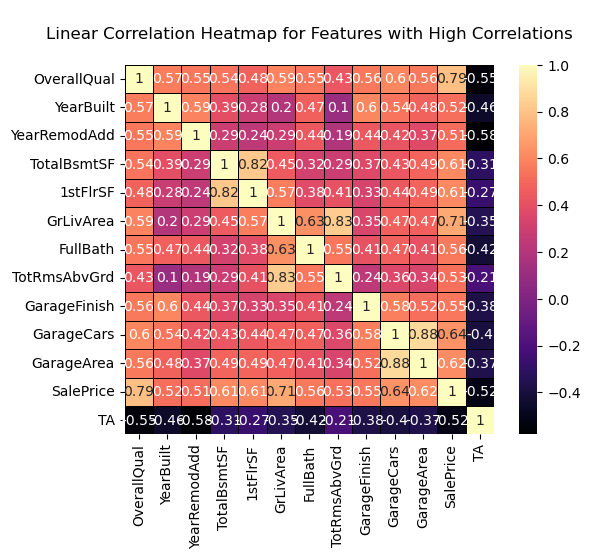

In [51]:
# using the result from above code, creating a heatmap with features with high correlations
# filtering features
high_housing = housing_train.loc[:, ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea', 'SalePrice', 'TA']]

# creating correlation matrix
high_housing.corr(method = 'pearson').round(decimals = 2)

# developing a spicy heatmap
sns.heatmap(data       = high_housing.corr(method = 'pearson').round(decimals = 2), # the correlation matrix
            cmap       = 'magma'    , # changing to SPICY colors
            square     = True         , # tightening the layout
            annot      = True         , # plotting numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be


# title and displaying the plot
plt.title(label = """
Linear Correlation Heatmap for Features with High Correlations
""")


# showing the finished product
plt.show()

<h2>Data visualizations </h2>

The above vizual image is the linear correlation heatmap for features that showed correlation more than 0.5 against sale price. As the indicator on the right hand side guides, darker colors shows low correlation and brighter color shows high correlations. Heatmap makes it easier to identify patterns. For example, among the selected features, TA has low correlation among all features.

When focusing on the column sale price, the colors tends to be brighter than other region. Among all, the feature overall quality tends to contain bright colors, which is showing high correlation. And when it comes to the bottom right side, there are square bright spot, which makes it easier to find that since features are related to garage, it is showing higher correlation against other garage based features.

<h2>Finding Outliers</h2>

Based on the original train dataset, the columns below showed a high correlation (> 0.5) against SalePrice.


- OverallQual 0.79: rating/categorical
- GrLivArea 0.71: continuous
- GarageCars 0.64: count
- GarageArea 0.62: continuous
- TotalBsmtSF 0.61: continuous
- 1stFlrSF 0.61: continuous
- FullBath 0.56: count
- GarageFinish 0.55: categorical
- TotRmsAbvGrd 0.53: count
- YearBuilt 0.52: year
- YearRemodAdd 0.51: year


When it comes to machine learning, finding outliers is important. That is because outliers can have a significant impact on statistical analysis. What we call and identify as outliers are the values that lie far away from other values in the dataset. As shown below with a visual image, we can identify the outliers in the color red, which is spotted away from the trend. 

When outliers are in a dataset, they can affect the mean and correlations for example. Since they are extreme values, containing them and considering them with other values in the dataset might lead to incorrect measurement of the dataset. If the measurement is incorrect, that will lead the observers to misjudge and take inappropriate actions. In addition, this can also have a negative impact on machine learning models. Keeping the outliers with other values might influence the regression line, reduce the performance of the model, and might end up having inaccurate predictions.


Therefore, it is important to identify the outliers and treat them properly. For our team, we identified the outliers by calculating the z-score for each feature. It indicates the difference from the standard deviation, and our team defined the values that have a z score of more than 3 as outliers.

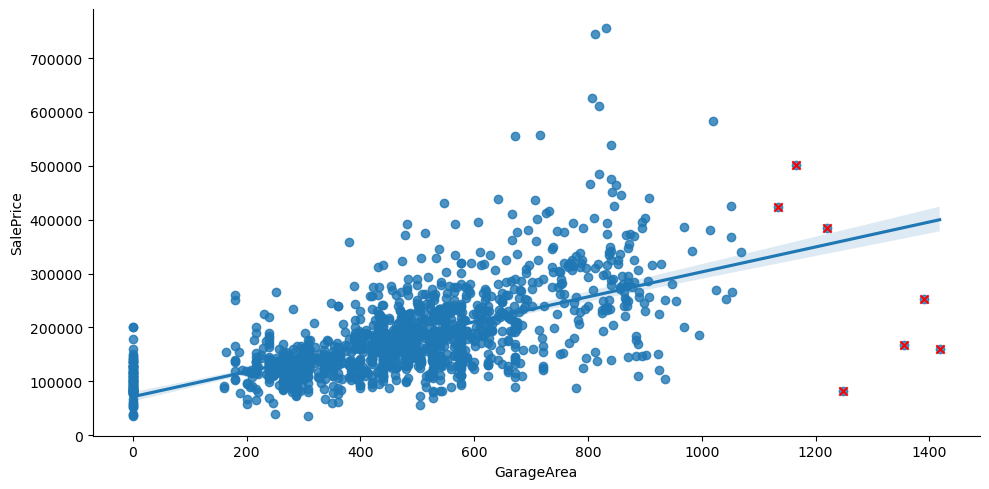

In [52]:
# visualizing the outliers
# instantiating an lmplot for GarageArea and sale price
sns.lmplot(x       = 'GarageArea' , # x-axis feature
           y       = 'SalePrice' , # y-axis feature
           hue     = None    , # categorical data for subsets
           scatter = True    , # renders a scatter plot
           fit_reg = True    , # renders a regression line
           aspect  = 2       , # aspect ratio for plot
           data    = housing_train) # DataFrame where features exist

# calculating z score
z_score_h_train = np.abs(stats.zscore(housing_train['GarageArea']))

# identify outliers with z-score greater than 3
outliers = np.where(z_score_h_train > 3)

# plot outliers on scatterplot
plt.scatter(housing_train.iloc[outliers[0]]['GarageArea'], housing_train.iloc[outliers[0]]['SalePrice'], marker='x', color='r')

# show the plot
plt.show()

This scatters plot shows the correlation between the sale price and the garage area. From the trend line, it can be said that the greater the garage area is, the higher the price becomes. This is because most of the time the size of the garage area is based on the number of cars people own, and to get a larger space for the garage area, people need to buy more land. 

From around 200 to 700 square feet is the common range of garage size, which is the average size for 2 cars to fit in. Focusing on outliers considering this, having more than 1170 square feet with a lower sales price does not always happen in the urban community. Therefore, in this case, it is appropriate to adjust the maximum size of the garage area so that the outliers with extreme values would not affect the entire value.

In [53]:
# outlier treatment for GarageArea

# calculating z-score
housing_train['z_GarageArea'] = np.abs(stats.zscore(housing_train['GarageArea']))

# setting threshold value to 3
threshold_value = 3

# removing outliers
housing_train = housing_train[abs(housing_train['z_GarageArea']) < threshold_value]

# creating a new column with adjusted data
housing_train['adj_GarageArea'] = housing_train['GarageArea']

# set the values of the filtered column to 1170 for the outliers
# setting limit for maximum value
housing_train.loc[abs(housing_train['z_GarageArea']) >= 3, 'adj_GarageArea'] = 1170

In [54]:
# dropping the columns z_GrLivArea because it is the z score
housing_train = housing_train.drop(['z_GarageArea'], axis = 1)

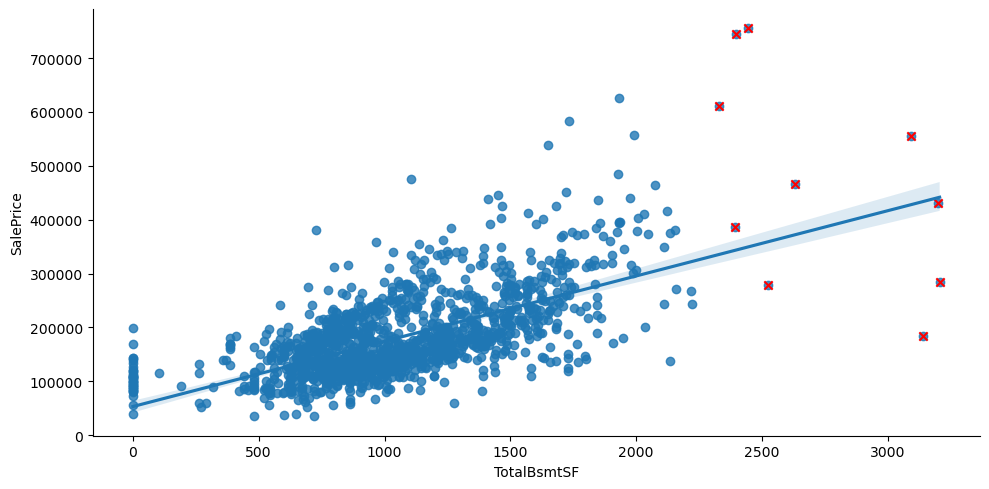

In [55]:
# visualizing the outliers
# instantiating an lmplot for TotalBsmtSF and sale price
sns.lmplot(x       = 'TotalBsmtSF' , # x-axis feature
           y       = 'SalePrice' , # y-axis feature
           hue     = None    , # categorical data for subsets
           scatter = True    , # renders a scatter plot
           fit_reg = True    , # renders a regression line
           aspect  = 2       , # aspect ratio for plot
           data    = housing_train) # DataFrame where features exist

# calculating z score
z_score_h_train = np.abs(stats.zscore(housing_train['TotalBsmtSF']))

# identify outliers with z-score greater than 3
outliers = np.where(z_score_h_train > 3)

# plot outliers on scatterplot
plt.scatter(housing_train.iloc[outliers[0]]['TotalBsmtSF'], housing_train.iloc[outliers[0]]['SalePrice'], marker='x', color='r')

# show the plot
plt.show()


This scatterplot shows the correlation between the sale price and total basement square feet. From this visual image, it can be said that it is common to have a basement and the size of the basement relates to the size of the living space. The general range is widely spread around 500 square feet to 1800 square feet. However, there is a clear distance among data points before 2400 square feet and beyond 2400 square feet. 

Therefore, it is considered appropriate to assume that the maximum size of the basement that can be considered legitimate is 2400 square feet, and other than that is an exception. 

In [56]:
# outlier treatment for TotalBsmtSF

# calculating z-score
housing_train['z_TotalBsmtSF'] = np.abs(stats.zscore(housing_train['TotalBsmtSF']))

# setting threshold value to 3
threshold_value = 3

# removing outliers
housing_train = housing_train[abs(housing_train['z_TotalBsmtSF']) < threshold_value]

# creating a new column with adjusted data
housing_train['adj_TotalBsmtSF'] = housing_train['TotalBsmtSF']

# set the values of the filtered column to 2400 for the outliers
# setting limit for maximum value
housing_train.loc[abs(housing_train['z_TotalBsmtSF']) >= 3, 'adj_TotalBsmtSF'] = 2400

In [57]:
# dropping the columns z_TotalBsmtSF because it is the z score
housing_train = housing_train.drop(['z_TotalBsmtSF'], axis = 1)

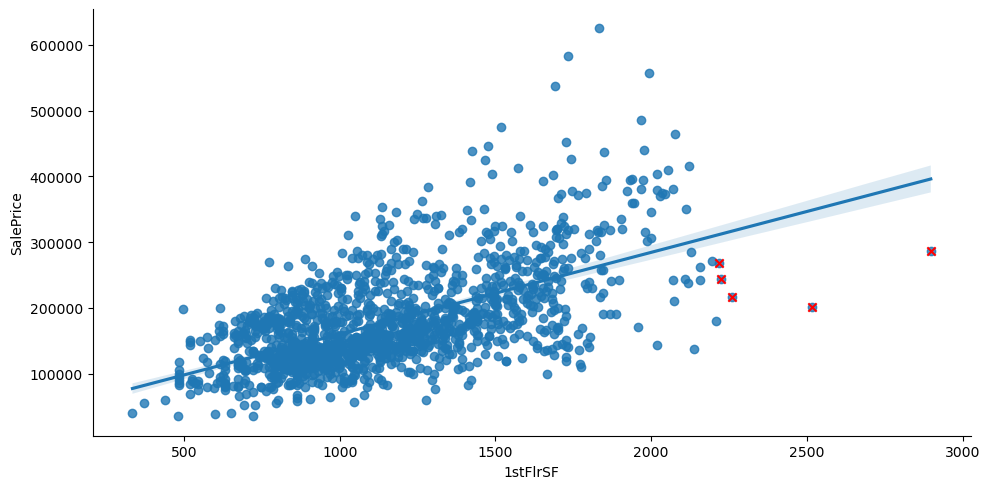

In [58]:
# visualizing
# instantiating an lmplot for 1stFlrSF and sale price
sns.lmplot(x       = '1stFlrSF' , # x-axis feature
           y       = 'SalePrice' , # y-axis feature
           hue     = None    , # categorical data for subsets
           scatter = True    , # renders a scatter plot
           fit_reg = True    , # renders a regression line
           aspect  = 2       , # aspect ratio for plot
           data    = housing_train) # DataFrame where features exist

# calculating z score
z_score_h_train = np.abs(stats.zscore(housing_train['1stFlrSF']))

# identify outliers with z-score greater than 3
outliers = np.where(z_score_h_train > 3)

# plot outliers on scatterplot
plt.scatter(housing_train.iloc[outliers[0]]['1stFlrSF'], housing_train.iloc[outliers[0]]['SalePrice'], marker='x', color='r')

# show the plot
plt.show()


This scatters plot shows the correlation between the sales price and 1st-floor square feet. The trend shows that the greater the size of the first floor, the higher the price of the house. Distribution is well scattered, and the range is around 500 to 1800 square feet in general. 

Focusing on the outliers, the maximum range of the first floor that is considered legitimate is around 2400 square feet. When it gets beyond that, data shows that it is not appropriate to consider those extreme values with other values. 

In [59]:
# calculating z-score
housing_train['z_1stFlrSF'] = np.abs(stats.zscore(housing_train['1stFlrSF']))

# setting threshold value to 3
threshold_value = 3

# removing outliers
housing_train = housing_train[abs(housing_train['z_1stFlrSF']) < threshold_value]

# creating a new column with adjusted data
housing_train['adj_1stFlrSF'] = housing_train['1stFlrSF']

# for the outliers, replacing it with 2400
# this way, limiting the maximum value 
housing_train.loc[abs(housing_train['z_1stFlrSF']) >= 3, 'adj_1stFlrSF'] = 2400

In [60]:
# dropping column z_1stFlrSF because it is the z score for 1stFlrSF
housing_train = housing_train.drop(['z_1stFlrSF'], axis = 1)

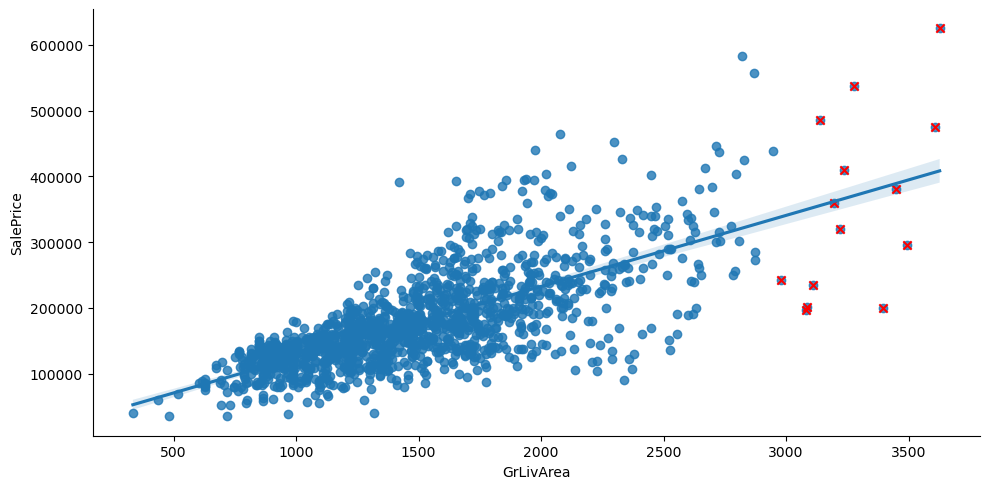

In [61]:
# visualizing the outliers
# instantiating an lmplot for GrLivArea and sale price
sns.lmplot(x       = 'GrLivArea' , # x-axis feature
           y       = 'SalePrice' , # y-axis feature
           hue     = None    , # categorical data for subsets
           scatter = True    , # renders a scatter plot
           fit_reg = True    , # renders a regression line
           aspect  = 2       , # aspect ratio for plot
           data    = housing_train) # DataFrame where features exist

# calculating z score
z_score_h_train = np.abs(stats.zscore(housing_train['GrLivArea']))

# identify outliers with z-score greater than 3
outliers = np.where(z_score_h_train > 3)

# plot outliers on scatterplot
plt.scatter(housing_train.iloc[outliers[0]]['GrLivArea'], housing_train.iloc[outliers[0]]['SalePrice'], marker='x', color='r')

# show the plot
plt.show()

This scatter plot shows the correlation between the sale price and the above-grade (ground) living area. The trend tells us that the greater the size, the higher the price becomes for the house. Having a wide living area with a certain grade requires land and good construction. 

Considering restrictions and laws, there may not be that much of a difference in the quality. That is why when focusing on a certain size, for example, values of 1000 square feet, the range of sale price does not become too wide. The common range of living area will be around 600 to 2400 square feet. Beyond that, there is a gap after 2900 square feet. For those extreme values, it is better not to analyze them with other values. Therefore, it is appropriate to set a limit to a maximum living area size of around 3000. 

In [62]:
# outlier treatment for GrLivArea

# calculating z-score
housing_train['z_GrLivArea'] = np.abs(stats.zscore(housing_train['GrLivArea']))

# setting threshold value to 3
threshold_value = 3

# removing outliers
housing_train = housing_train[abs(housing_train['z_GrLivArea']) < threshold_value]

# creating a new column with adjusted data
housing_train['adj_GrLivArea'] = housing_train['GrLivArea']

# set the values of the filtered column to 3000 for the outliers
# setting limit for maximum value
housing_train.loc[abs(housing_train['z_GrLivArea']) >= 3, 'adj_GrLivArea'] = 3000

In [63]:
# dropping the columns z_GrLivArea because it is the z score
housing_train = housing_train.drop(['z_GrLivArea'], axis = 1)

<h2>Gradient Boosting Regression model</h2>

Our team utilized a Gradient Boosting Regression model to predict the sale prices of houses based on various features such as quality, year built, and living area. After analyzing the data, we identified a set of highly correlated features that can accurately predict the sale prices of houses. Here are the top three insights we derived:

The first and most important insight is that overall quality has the highest correlation with the sale price. This means that the quality of materials used in building the house, the finishes, and the workmanship can significantly impact the sale price. For instance, a house that has high-quality materials and finishes, such as granite countertops or hardwood floors, will command a higher price than one with lower-quality materials, such as laminate countertops or vinyl floors.

The second insight we found is that the size of the living area and garage space can also significantly impact the sale price. A larger living area and garage can increase the sale price, while a smaller living area and garage can decrease it. This is because people tend to want more space, whether it's for their families or their cars. Thus, houses with larger living areas and garages will command a higher price.

Finally, the age of the property and the year of its last renovation have a significant impact on the sale price. A newer property or one that has been recently renovated is likely to command a higher sale price compared to an older one that has not been updated. This is because newer properties are generally in better condition and are less likely to require major repairs or renovations, which can be expensive and time-consuming. (Rodda, 2005)

In summary, our analysis found that quality, living area, garage space, age, and renovation history are key factors to consider when buying or selling a property. By keeping these factors in mind, real estate agents and property investors can make informed decisions that will lead to successful transactions. By utilizing the insights provided by our model, they can maximize the sale price of their properties and achieve their desired outcomes.


In [64]:

# Define current year

current_year = datetime.datetime.now().year

# Create new feature 'GarageAge'
housing_test['GarageAge'] = current_year - housing_test['GarageYrBlt']

# Create binary feature indicating missing values in 'GarageYrBlt'
housing_test['GarageYrBlt_Missing'] = housing_test['GarageYrBlt'].isnull().astype(int)


# Fill missing values in 'GarageYrBlt' with median year
median_year = housing_train['GarageYrBlt'].median()
housing_train['GarageYrBlt'] = housing_train['GarageYrBlt'].fillna(median_year)
# Create new feature 'GarageSize'
housing_test['GarageSize'] = housing_test['GarageCars'] * housing_test['GarageArea']
from sklearn.impute import SimpleImputer
# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')
housing_test['GarageSize'] = imputer.fit_transform(housing_test[['GarageSize']])
housing_test['GarageYrBlt'] = imputer.fit_transform(housing_test[['GarageYrBlt']])

<h2>Insight 3: Feature engineering</h2>

Building features from existing columns give you a better idea of what might be worth the money. 

For example, Garage Cars and Garage area had a correlation score of 0.64 and 0.62 but upon combing them the correlation score went up to 0.68. A correlation value of 0.68 between 'GarageSize' and 'SalePrice' suggests a moderately strong positive relationship between the two variables. 

This means that as 'GarageSize' increases, 'SalePrice' tends to increase as well. But it is also important to keep in mind that correlation does not necessarily imply causation, and there may be other factors that influence the relationship between garage size and sale price. But for now, there were somewhat good chances of the Price of the house high if it had a good garage size.

Additionally, while a good garage size may increase the likelihood of a higher sale price, it's not the only factor that potential buyers may consider when making a purchase decision.

In [65]:

x_data = [ 'OverallQual','GrLivArea',
# 'GarageCars',     
'GarageArea',      
#'TotalBsmtSF',  # <- does not work    
'1stFlrSF', # 'GarageFinish',        
'FullBath',         
'TotRmsAbvGrd',    
#'YearBuilt',        
'YearRemodAdd',  # 'GarageYrBlt', #'TA' not in index error
#'GarageYrBlt',    
# 'MasVnrArea',      
'Fireplaces', #'BsmtFinSF1',      'LotFrontage',      'OpenPorchSF',      'WoodDeckSF',       '2ndFlrSF',        'HalfBath',         'LotArea',          'BsmtFullBath',     'BsmtUnfSF',       'BedroomAbvGr',     'KitchenAbvGr',     'EnclosedPorch',    
#'ScreenPorch',     'PoolArea',         'MSSubClass',       'OverallCond',     'MoSold',          '3SsnPorch',        'YrSold',         'LowQualFinSF',                'MiscVal',          'BsmtHalfBath',     'BsmtFinSF2'  
         ]
# setting x_train
x_train = housing_train[ x_data ]

# setting y_train
y_train = housing_train[ 'SalePrice' ] 
# y_train = (np.log(housing_train['SalePrice'])) #housing_train[ 'SalePrice']

In [66]:
x_train.isna().any()

OverallQual     False
GrLivArea       False
GarageArea      False
1stFlrSF        False
FullBath        False
TotRmsAbvGrd    False
YearRemodAdd    False
Fireplaces      False
dtype: bool

In [67]:
housing_train['TotalBsmtSF'].isna().sum()
        

0

In [68]:
from sklearn.tree     import DecisionTreeRegressor     # regression trees

#initializing the model
model = DecisionTreeRegressor()




# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square


# displaying results
print('Training Score :', model_train_score)

Training Score : 0.9999


<h2> Decision Tree Regressor: Base Model Analysis </h2>

Based on the training score of 0.9999, it is highly likely that the decision tree model is overfitting the training data. This means that the model is memorizing the training data instead of learning the underlying patterns, which can lead to poor performance on new data.

To address this issue, we tune the hyperparameters of the decision tree model and tried different models altogether. One another approach we took is to perform feature selection and combination to reduce the complexity of the model and prevent overfitting.


In our case, the final features used in the model were OverallQual, GrLivArea, GarageArea, 1stFlrSF, FullBath, TotRmsAbvGrd, YearRemodAdd, GarageSize, and Fireplaces. It is possible that some of these features were highly correlated, leading to redundancy in the model and increased complexity.

To address this issue, we performed feature selection using techniques such as correlation analysis or forward/backward selection to identify the most important features for predicting house prices. Alternatively, we combined certain features or created new features to capture additional information that could improve the model's performance.


In [69]:


# model name
model_name = 'Team2 DecisionTreeRegressor'

# saving the ranges for parameters for Regressiontree
criterion_range_rt = ["squared_error", "friedman_mse", "absolute_error"]
max_depth_range_rt = [2,4,6]
min_samples_split_range_rt = [2,4,6]
min_samples_leaf_range_rt = [1,10,15]


# making the grid using the ranges and name of the parameter to feed to the RandomSearchCV
param_grid_rt = {'criterion' : criterion_range_rt,
              'max_depth' : max_depth_range_rt,
              'min_samples_split' : min_samples_split_range_rt,
              'min_samples_leaf' : min_samples_leaf_range_rt}

In [70]:
model_name = 'Team2 DecisionTreeRegressor'

# INSTANTIATING the model object without hyperparameters
model = DecisionTreeRegressor(
                              )



# RandomizedSearchCV object
model_cv_rt = RandomizedSearchCV(estimator           = model,
                              param_distributions = param_grid_rt,
                              n_iter              = 1000,
                              cv                  = 3,
                              random_state        = 219)



# FITTING to the FULL DATASET (due to cross-validation)
model_cv_rt.fit(x_train, y_train)



# printing the optimal parameters and best score
print(f"Tuned Parameters: {model_cv_rt.best_params_}")
print(f"Tuned R-Square:   {model_cv_rt.best_score_}")

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 81 is smaller than n_iter=1000. Running 81 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Tuned Parameters: {'min_samples_split': 2, 'min_samples_leaf': 10, 'max_depth': 6, 'criterion': 'squared_error'}
Tuned R-Square:   0.7687073553348843


In [71]:
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor
#initializing the model
model = RandomForestRegressor()



# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square


# displaying results
print('Training Score :', model_train_score)




Training Score : 0.9794


In [72]:
# model name
model_name = 'Team2 RandomForestRegressor '

# saving the ranges for parameters for Randomforest
criterion_range_rf = ["squared_error", "absolute_error", "poisson"]
n_estimators_range_rf = [10,20,30]
min_samples_split_range_rf = [2,4,6]
max_leaf_nodes_range_rf = range(1,10,2)

# making the grid using the ranges and name of the parameter to feed to the RandomSearchCV
param_grid_rf = {'criterion' : criterion_range_rf,
              'n_estimators' : n_estimators_range_rf,
              'min_samples_split' : min_samples_split_range_rf,
              'max_leaf_nodes' : max_leaf_nodes_range_rf}

In [73]:
# model name
model_name = 'Team2 RandomForestRegressor'

# INSTANTIATING the model object without hyperparameters
model = RandomForestRegressor(
                              )



# RandomizedSearchCV object
model_cv_rf = RandomizedSearchCV(estimator           = model,
                              param_distributions = param_grid_rf,
                              n_iter              = 1000,
                              cv                  = 3,
                              random_state        = 219)



# FITTING to the FULL DATASET (due to cross-validation)
#model_cv_rf.fit(x_train, y_train)                       # Not trigger  for performance



# printing the optimal parameters and best score
#print(f"Tuned Parameters: {model_cv_rf.best_params_}")
#print(f"Tuned R-Square:   {model_cv_rf.best_score_}")

In [74]:

from sklearn.ensemble import GradientBoostingRegressor
#initializing the model
model = GradientBoostingRegressor(n_estimators= 200, max_depth=  2, loss = 'huber', learning_rate= 0.1, criterion= 'squared_error')



# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square


# displaying results
print('Training Score :', model_train_score)

Training Score : 0.9021


<h2> Final Model : GBM Analysis </h2>

Gradient boosting is a powerful ensemble learning technique that has been proven to outperform other machine learning models such as decision trees, random forest, linear regression, Lasso, and Ridge in various scenarios. There are several reasons why gradient boosting might have performed better than other models for the given dataset.

Gradient boosting is a boosting algorithm that combines several weak models to create a strong model. In this case, the model is trained on a set of decision trees, where each subsequent tree tries to correct the errors of the previous tree. This sequential approach allows the model to learn complex relationships between features and the target variable, leading to higher accuracy in prediction. (Hjort, 2022)

The hyperparameters used in the gradient boosting model could have played a role in its superior performance. For instance, the use of the Huber loss function instead of the mean squared error (MSE) loss function could have made the model more robust to outliers. The Huber loss function is less sensitive to outliers than MSE, which can be helpful in real-world scenarios where the dataset may contain outliers.

The gradient boosting algorithm is less prone to overfitting than decision trees or random forests, as it uses regularization techniques such as subsampling, which reduces the variance of the model. This makes the model more generalizable and less prone to errors on unseen data.

The learning rate and the number of estimators used in the gradient boosting model could have contributed to its superior performance. By setting a low learning rate and increasing the number of estimators, the model is able to learn more complex patterns in the data, leading to improved accuracy.

The gradient boosting algorithm is suitable for non-linear relationships between the target variable and the features, making it a suitable choice for predicting housing prices where the relationship between features and price is not always linear.

We highly believe that the gradient boosting algorithm's ability to handle non-linearity, regularization techniques, and boosting approach make it a powerful and reliable model for predicting housing prices. Its superior performance over other models can be attributed to its ability to learn complex relationships between features and the target variable, making it a suitable choice for real-world applications.


In [75]:
# model name
model_name = 'Team2 GBM'




# saving the ranges for parameters for Randomforest
loss_range_gbm = ['squared_error', 'absolute_error', 'huber', 'quantile']
n_estimators_range_gbm = [50, 100, 150, 200]
criterion_range_gbm = ['friedman_mse', 'squared_error']
learning_rate_range_gbm = [0.1,0.2,0.3,0.5]
max_depth_range_gbm = [1,2,3,5]


# making the grid using the ranges and name of the parameter to feed to the RandomSearchCV
param_grid_gbm = {'loss' : loss_range_gbm,
                  'n_estimators' :  n_estimators_range_gbm,                 
                  'criterion' : criterion_range_gbm,
              'learning_rate' : learning_rate_range_gbm,
              'max_depth' : max_depth_range_gbm }

In [76]:
# model name
model_name = 'Team2 GradientBoostingRegressor'

# INSTANTIATING the model object without hyperparameters
model = GradientBoostingRegressor(
                              )



# RandomizedSearchCV object
model_cv_gbm = RandomizedSearchCV(estimator           = model,
                              param_distributions = param_grid_gbm,
                              n_iter              = 1000,
                              cv                  = 3,
                              random_state        = 219)



# FITTING to the FULL DATASET (due to cross-validation)
#model_cv_gbm.fit(x_train, y_train)                      # Not trigger  for performance



# printing the optimal parameters and best score
#print(f"Tuned Parameters: {model_cv_gbm.best_params_}")
#print(f"Tuned R-Square:   {model_cv_gbm.best_score_}")

# 'n_estimators': 200, 'max_depth': 2, 'loss': 'huber', 'learning_rate': 0.1, 'criterion': 'squared_error'

In [77]:
# picking a model name
model_name = "Linear Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square


# displaying results
print('Training Score :', model_train_score)



Training Score : 0.8076


In [78]:

# picking a model name
model_name = "Lasso"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.Lasso(alpha     = 1.0,  # default shrinkage
                                         normalize = True)


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square


# displaying results
print('Training Score :', model_train_score)

Training Score : 0.8076


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


In [79]:
# setting x_test
x_test  = housing_test[ x_data ]

# PREDICTING on new data
model_pred = model.predict(x_test)

# checking results
model_pred

array([122462.18832247, 149952.54937883, 165680.78522001, ...,
       163127.92378484, 100100.62401501, 228136.66506459])

In [80]:
# saving predictions with their respective Ids from the test set
predictions = pd.DataFrame(data = { 'Id'        : housing_test['Id'],
                                    'SalePrice' : model_pred        } )

# checking the results
predictions.head(n = 5)

,Id,SalePrice
0,1461,122462.188322
1,1462,149952.549379
2,1463,165680.785220
3,1464,182245.463419
4,1465,212743.781424


In [81]:
# sending predictions to .csv file
predictions.to_csv(path_or_buf = 'submission.csv',
                   index = False)

<h2> Conclusion </h2>

In conclusion, analyzing the housing prices in the USA using various techniques such as feature importance analysis, spatial analysis, and feature engineering can provide valuable insights into the factors that influence housing prices. These insights can help buyers and sellers understand the most valuable selling points of a house and identify potential areas for investment or development. By using machine learning models such as random forest or gradient boosting, we can identify the most important predictors of house prices, such as 'OverallQual', 'GrLivArea', 'GarageArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd'etc. 

Spatial analysis can help us understand how different factors impact different regions and how housing prices can vary significantly depending on location. By finding the correlation of columns with SalePrice and visualizing spatial patterns and relationships, we can identify areas where housing demand is likely to be higher, and where prices may be more likely to rise in the future.
Feature engineering involves building new features from existing columns to gain a better understanding of what might be worth the money. By combining variables such as 'GarageCars' and 'GarageArea', we can create a new feature that has a stronger correlation with sale price.

Overall, by leveraging the power of machine learning and data analysis techniques, we can gain valuable insights into the complex world of housing prices and make more informed decisions about real estate investments.

<h2>References</h2>

Rodda, D. T., & Patrabansh, S. (2005). The relationship between homeowner age and house price appreciation. U.S. Department of Housing and Urban Development, Office of Policy Development and Research. Grant No. H-21452 RG. https://www.huduser.gov/publications/pdf/HouseAppreciation_and_age_relationship.pdf

Hjort, A., Pensar, J., Scheel, I., & Sommervoll, D. E. (2022). House price prediction with gradient boosted trees under different loss functions. Journal of Property Research, 39(3), 338-364. https://doi.org/10.1080/09599916.2022.2070525

Daly, L. (2022). How Many Cars are in U.S.? Car Ownership Statistics 2022. The Ascent.

